In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('E:\work\DataSets\coinmarketcap_06122017.csv')

In [3]:
df.head()

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1326 non-null   int64  
 1   24h_volume_usd      1270 non-null   float64
 2   available_supply    1031 non-null   float64
 3   id                  1326 non-null   object 
 4   last_updated        1326 non-null   int64  
 5   market_cap_usd      1031 non-null   float64
 6   max_supply          215 non-null    float64
 7   name                1326 non-null   object 
 8   percent_change_1h   1273 non-null   float64
 9   percent_change_24h  1270 non-null   float64
 10  percent_change_7d   1283 non-null   float64
 11  price_btc           1326 non-null   float64
 12  price_usd           1326 non-null   float64
 13  rank                1326 non-null   int64  
 14  symbol              1326 non-null   object 
 15  total_supply        1211 non-null   float64
dtypes: flo

In [4]:
market_cap_raw=df[['market_cap_usd','id']]
market_cap_raw

,market_cap_usd,id
0,2.130493e+11,bitcoin
1,4.352945e+10,ethereum
2,2.529585e+10,bitcoin-cash
3,1.475225e+10,iota
4,9.365343e+09,ripple
...,...,...
1321,NaN,turbocoin
1322,NaN,birds
1323,NaN,bitcoincashscrypt
1324,NaN,swisscoin


<h3>Discard the cryptocurrencies without a market capitalization</h3>

In [6]:
market_cap_raw.count()

market_cap_usd    1031
id                1326
dtype: int64

some cryptocurrencies listed in coinmarketcap.com have no known market capitalization, this is represented by NaN in the data, and NaNs are not counted by count(). These cryptocurrencies are of little interest to us in this analysis, so they are safe to remove.

In [7]:
market_cap_raw.isnull().sum()

market_cap_usd    295
id                  0
dtype: int64

so,there is 295 nan value in 'market_cap_raw' column

In [8]:
#Removing Nan values
market_cap_raw.dropna(subset=['market_cap_usd'],axis=0,inplace=True)

<ipython-input-8-9cc7344c9a20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_cap_raw.dropna(subset=['market_cap_usd'],axis=0,inplace=True)


<h3>How big is Bitcoin compared with the rest of the cryptocurrencies?</h3>
<p>plot of market capitalization for the top 10 coins</p> 

In [9]:
market_cap_raw['percent']=(market_cap_raw['market_cap_usd']/market_cap_raw['market_cap_usd'].sum())*100

<ipython-input-9-3ff6c5889364>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_cap_raw['percent']=(market_cap_raw['market_cap_usd']/market_cap_raw['market_cap_usd'].sum())*100


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'bitcoin'),
  Text(1, 0, 'ethereum'),
  Text(2, 0, 'bitcoin-cash'),
  Text(3, 0, 'iota'),
  Text(4, 0, 'ripple'),
  Text(5, 0, 'dash'),
  Text(6, 0, 'litecoin'),
  Text(7, 0, 'bitcoin-gold'),
  Text(8, 0, 'monero'),
  Text(9, 0, 'cardano')])

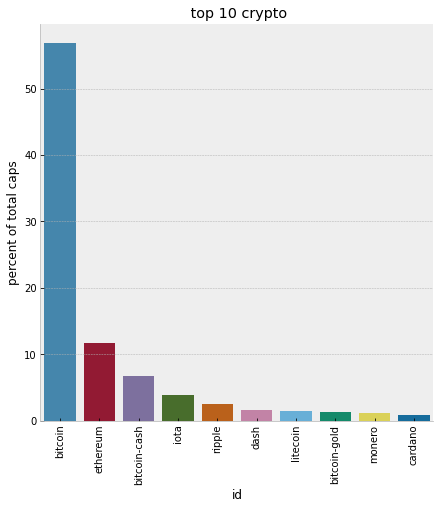

In [10]:
plt.style.use('bmh')
largest_coins=market_cap_raw.sort_values(by='market_cap_usd',ascending=False).head(10)
g=sns.catplot(y='percent',x='id',data=largest_coins,kind='bar',height=6)
g.set(xlabel='id',ylabel='percent of total caps',title=' top 10 crypto')
plt.xticks(rotation=90)

<h3>Volatility in cryptocurrencies</h3>
<p>we explore this volatility  by selecting and plotting the 24 hours and 7 days percentage change, which we already have available</p>

In [11]:
vol=df[['id','percent_change_24h','percent_change_7d']]
vol=vol.set_index('id').dropna().sort_values('percent_change_24h')
vol.head()

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


<h3>top 10 biggest gainers and top 10 losers in market capitalization</h3>

In [12]:
vol

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96
...,...,...
eaglecoin,272.50,114.73
beatcoin,295.49,132.79
bitzeny,416.04,3360.71


In [13]:
vol=vol.reset_index()

In [14]:
gainer=vol[['id','percent_change_24h']].set_index('id').sort_values('percent_change_24h',ascending=False).head(10)

In [15]:
looser=vol[['id','percent_change_24h']].set_index('id').sort_values('percent_change_24h').head(10)

<ipython-input-16-0841ec835a59>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(gainer.index,rotation=90)
<ipython-input-16-0841ec835a59>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(looser.index,rotation=90)


Text(0.5, 0.98, 'top 10 biggest gainers and top 10 losers 24 hours')

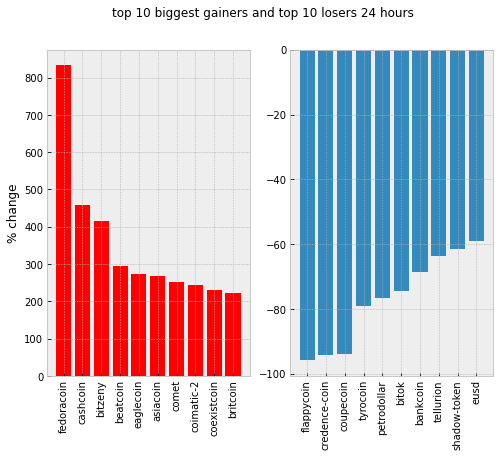

In [16]:
fig,ax=plt.subplots(1,2,figsize=(8,6))
ax[0].bar(gainer.index,gainer['percent_change_24h'],color='red')
ax[1].bar(looser.index,looser['percent_change_24h'])
ax[0].set_xticklabels(gainer.index,rotation=90)
ax[1].set_xticklabels(looser.index,rotation=90)
ax[0].set_ylabel('% change')
fig.suptitle('top 10 biggest gainers and top 10 losers 24 hours')

<ipython-input-21-7bab4ea5feb7>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(gainer_weekly.index,rotation=90)
<ipython-input-21-7bab4ea5feb7>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(looser_weekly.index,rotation=90)


Text(0.5, 0.98, 'top 10 biggest gainers and top 10 losers 7 days')

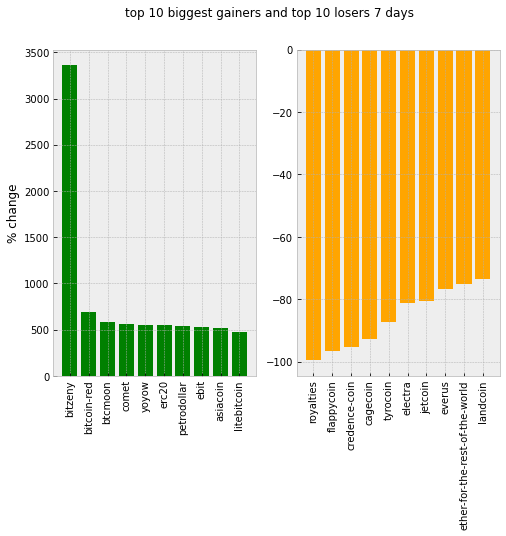

In [21]:
gainer_weekly=vol[['id','percent_change_7d']].set_index('id').sort_values('percent_change_7d',ascending=False).head(10)
looser_weekly=vol[['id','percent_change_7d']].set_index('id').sort_values('percent_change_7d').head(10)
fig,ax=plt.subplots(1,2,figsize=(8,6))
ax[0].bar(gainer_weekly.index,gainer_weekly['percent_change_7d'],color='green')
ax[1].bar(looser_weekly.index,looser_weekly['percent_change_7d'],color='orange')
ax[0].set_xticklabels(gainer_weekly.index,rotation=90)
ax[1].set_xticklabels(looser_weekly.index,rotation=90)
ax[0].set_ylabel('% change')
fig.suptitle('top 10 biggest gainers and top 10 losers 7 days')

<p>Many coins are not comparable to large companies in market cap, so we divert from the original Investopedia definition by merging categories.</p>
<p>These are the market cap definitions :</p>
<p>Large cap: +10 billion</p>
<p>Mid cap: 2 billion - 10 billion</p>
<p>Small cap: 300 million - 2 billion</p>
<p>Micro cap: 50 million - 300 million</p>
<p>Nano cap: Below 50 million</p>
<p>We group large, mid and small cap coins into a group called biggish </p>

Text(0.5, 0.98, 'barplot of counts of biggish, micro and nano coins')

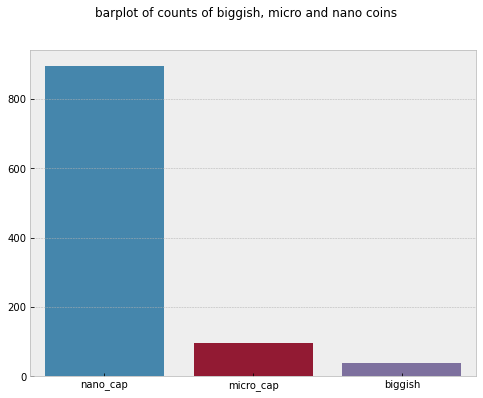

In [16]:
plt.style.use('bmh')
fig,ax=plt.subplots(figsize=(8,6))
def counter(string):
    k=market_cap_raw.query(string).count().id
    return k
nano_cap=counter('market_cap_usd<5E+7')
micro_cap=counter('market_cap_usd>5E+7 & market_cap_usd<3E+8')
biggish=counter('market_cap_usd>3E+8')
values=[nano_cap,micro_cap,biggish]
labels=['nano_cap','micro_cap','biggish']
sns.barplot(x=labels,y=values)
fig.suptitle('barplot of counts of biggish, micro and nano coins')